In [3]:
# import tensorflow as tf
# tf.__version__

'1.13.1'

In [13]:
import pandas as pd
import re

reviews = pd.read_csv("~/Project/data/amazon-fine-food-reviews/Reviews.csv")
print(reviews.shape)
print(reviews.head())
print(reviews.isnull().sum())

(568454, 10)
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality can

In [2]:
len(reviews['ProductId'].unique())

74258

## Data cleaning

In [39]:
import re

contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

# Expand common English contractions
def expand_contractions(text):
  
    compiled = re.compile('(%s)' % '|'.join(contractions.keys()))
    def replace(contraction):
        return contractions[contraction.group(0)]
    expanded = compiled.sub(replace, text)
    
    return expanded

# Clean the data
def cleaning_data(text):
    text = text.lower() # decapitalisation
    text = expand_contractions(text) # expand contractions
    text = re.sub(r'[^\w\s\.\?\!\,\:\;]','', text) # remove special characters and punctuations
    
    return text

In [49]:
import pandas as pd
import re

reviews = pd.read_csv("~/Project/data/amazon-fine-food-reviews/Reviews.csv")
reviews = reviews.dropna().reset_index(drop=True)

# print(reviews.shape)
# print(reviews.head())
# print(reviews.isnull().sum())

# reviews = reviews.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator',
#                         'Score','Time'], 1)
# reviews = reviews.reset_index(drop=True)

print(reviews.head())
for i in range(5):
    print("Review #",i+1)
    print(reviews.Summary[i])
    print(reviews.Text[i])
    print()

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [50]:
reviews.shape[0]
# reviews.Summary[25509]

'wow'

In [52]:
# Clean the summaries and texts
clean_texts = []
clean_summaries = []

for i in range(reviews.shape[0]):
    text = cleaning_data(reviews.Text[i])
    summary = cleaning_data(reviews.Summary[i])
    if len(summary.split()) >=2 and len(summary.split()) <=30:
        if len(text.split()) >=10 and len(text.split()) <=500:
            clean_summaries.append(summary)
            clean_texts.append(text)

dataset = pd.DataFrame()
dataset['text'] = clean_texts
dataset['summary'] = clean_summaries

dataset.to_csv('../../data/food_review.csv', index = False)


In [53]:
dataset.shape

(507920, 2)

In [16]:
# test
import pandas as pd

food_review = pd.read_csv('../../data/food_review.csv')
print(food_review.shape)
food_review.head()
for i in range(5):
    print("Review #",i+1)
    print('text: ',food_review.text[i])
    print('summary: ', food_review.summary[i])
    print()

(568411, 2)
Review # 1
text:  i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.
summary:  good quality dog food

Review # 2
text:  product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as jumbo.
summary:  not as advertised

Review # 3
text:  this is a confection that has been around a few centuries.  it is a light, pillowy citrus gelatin with nuts  in this case filberts. and it is cut into tiny squares and then liberally coated with powdered sugar.  and it is a tiny mouthful of heaven.  not too chewy, and very flavorful.  i highly recommend this yummy treat.  if you are familiar with the story of c.s. lewis the lion, the witch, and the wardrobe  this is

In [22]:
import csv
with open('../../data/food_review.csv') as f:
    reader = csv.reader(f)
    header = True
    for line in reader:
        if header == True:
            header = False
            continue
        else:
            text, summary = line
            print(text)
            print(summary)
#         yield {
#             "inputs": text,
#             "targets": summary,
#         }

i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.
good quality dog food
product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as jumbo.
not as advertised
this is a confection that has been around a few centuries.  it is a light, pillowy citrus gelatin with nuts  in this case filberts. and it is cut into tiny squares and then liberally coated with powdered sugar.  and it is a tiny mouthful of heaven.  not too chewy, and very flavorful.  i highly recommend this yummy treat.  if you are familiar with the story of c.s. lewis the lion, the witch, and the wardrobe  this is the treat that seduces edmund into selling out his brother and sisters to the witch.
de

a friend of mine brought these into work with the claim , these will change your life!  while my life is fairly unchanged, i cannot get enough of these chips . . . . and i do not even like kettle chips.  for the most part, i find kettle chips to be too thick and greasy, but the flavor of these chips is amazing!  the are the type of hot that is refreshing.  if you do not enjoy spicy or hot things . . . try these anyway, they may convert you.
i do not even like kettle chips and i love these
but if you happen to, like me, there is no better sea salt and vinegar chip i have found in this country.
you have to love sea salt and vinegar already
these are the best potato chips i have ever tasted.  it is easy to go through half of a bag without stopping.  the texturecrunchiness is just perfect, as is the salt and vinegar combination.  i do not know how they taste so much better than all of the other chips i have ever had, but they do.  and, judging from the nutrition facts, they seem to be heal

i work in college financial aid and keep a bowl of these on my desk for the students.  i used to buy them in the grocery store then learned i could get them for less online 17 for 3lb bag and thought that was a good deal  until i found this great deal!
dum dums for all!!
well worth the money. i did the calculations on different bags and this dollar amount  is an excellent value. there are approx 2338 pops in the box. so far i have been through about half the box and have found about 3 without wrappers. that is pretty good considering. if you need 30lbs of dumdums go for this product. enjoy.
lots of pops!
this is pretty good canned meat. the sausage i used in dirty rice, the hamburger i used for taco salad, the chicken with wild rice, and the pork with stuffing. the turkey i gave to a neighbor because i do not eat it. the various meats are all pretty good quality and was enough for 3 large portions each can. there were not large chunks of fat or gristle in any of the cans, which i have 

best sauce around
this is my favorite hot sauce. i buy it locally and love the flavor that they all have. hopefully the other flavors will show up on amazon for people to enjoy! my favorites are the medium and pineapple flavored ones so far. thank you for making a flavorful hot sauce!
tasty hot sauce!
so far i have had the habanero and the medium sauces and they were amazing. my fiance and i use them nearly daily and i just picked up 3 more. it goes really well on all sorts of dishes to add the extra kick.br br the sauce itself lasts a lot longer than it appears. it is thick and a bottle will last us a couple of weeks of heavy use. we love to use it for breakfast on eggs or in burritos and for dinners or soups for added spice.
best all around hot sauce
absolutely love the habenaro sauce...use it on eggs, sandwiches most anything for a good kick! have watched the progessing popularity of theis homegrown product...have nothing but the highes accolades for the chef and the product..get ou

cannot detect the prickly pear
butternut mountain maple syrup is the real deal. the grade b is wonderful on pancakes, or in coffee just about on anything you would like sweetened.br delivery was timely and the product came as expected. i recommend this!
maple syrup
i just received my shipment and could hardly wait to try this product. we love quot;slickersquot; which is what we call them, instead of stickers because they can be removed so easily. my daughter designed signs to be  printed in reverse to use on her car windows. they printed beautifully we  have the print shop program. i am going to have a lot of fun with this  product because there are windows everywhere and other surfaces like tv  screens and computer monitors.
wow make your own slickers !
this was a really good idea and the final product is outstanding. i use the decals on my car window and everybody asks where i bought the decals i made.  two thumbs up!
great product
after years of drinking red bull, rockstar, monster 

makes nasty loose poo! the dry food does the same thing. i have tried the adult version and the puppy version and both gave my adult dog and my puppy super soft and stinky stools.
makes nasty loose poo!
this product is very good.  it goes a long way.  but quite as good as the one at dd.  good product not the less.
very good.
i have purchased locally many other flavors of da vinci syrups, and ordered blueberry online to try it, because it isnt available locally and i love blueberry! well, this was a disappointment to me very very sugary sweet with little blueberry flavor; not to mention i paid 4x what i would pay locally.br very disappointed
da vinci sugar free blueberry syrup
i am a big fan of most of the freeze dried fruit and veggies, they are crunchy and flavorful and have nothing added.  the tomato fragments are extremely dry and tough, more like old sun dried, and for me they are only good when used in cooked dishes.  i do appreciate that these are organic!
just ok
i absolutely lo

fabulous  tasty but not awful for you!  i have already recommended to folks i work with.  will continue to purchase!
eat without feeling guilty!
it is simple. these chips taste great and are a healthier alternative to other brands. way better than anything baked! i highly recommend them!
pop chips variety
the popchips were excellent  had excellent flavor and low in calories.  when you eat these  do not need another potato chip!
popchips
these chips are delicious and low in calories.  i love the salt and vinegar, and the barbeque.  we buy them by the case.  they are great.  thanks for offering them.
these definately are 5 stars.  deeelicious
i love pop chips and the variety pack was fantastic.  delivered quickly  these chips are filling, full of flavor and way healthier than other types of chips.
love pop chips!
i first tried them after a product get together at jelly belly in fairfield, ca. i was so pleased, that i wanted more!  well my husband said he saw some at costco so he got a fe

good taste, way too hard.
i received this mix along with a waffle maker as a gift.  it is so good that i keep buying this same brand mix when i run out.br br i cut the farmhouse waffles recipe in half so that is 1 cup farmhouse pancake and waffle mix; 1 egg; 58 cup water; 2 tablespoon melted butter and it is more than enough batter for 2 waffles in a fullsize belgian waffle maker.br br easy to make and very tasty.
this is great stuff
nothing can compare to the waffle mix delivered by stonewall kitchen.  my mom complained about the price but i think the quality deserves the higher price than the regular pancakewaffle mix.  the waffle comes out golden and crispy.  i was using the presto 03510 flipside waffle maker.
best waffle mix i had in my life
i have been making belgian waffles using the stonewall kitchen farmhouse pancake and waffle mix for over three years.  my waffles are undoubtedly the best ever!!!  i like my waffles light and crisp  i cannot stand a heavy soggy waffle. these ju

dented can
the product is great ... but it is priced nearly twice what it retails for in local markets. i dont mind paying a little for convenience of home delivery, but this is too much
too expensive
received different than pictured. labels just say certified not d.o.p. certified. do not know if that is the same and after a couple of orders i am not going to put the effort in to find out.br also came with basil. i want tomatoes only. not basil.br a couple cans dented like others have said.br my case was 44 now its 60.br i am over the tomato thing. i will buy what i want in the store.
not sure what i got
of the 12 cans shipped 11 of them had very, very serious dents in them. i am not talking dings, i talking serious dents.  so dented that i truly thought of throwing them away.  my husband stopped me though because at 5 a can he felt that it was too wasteful.  in my local grocery store, items this dented are put into a reduced price bin, because they usually do not move otherwise.a href

my small mixed breed is a picky eater but he seems to like solos so long as i mix it with some good people food. he hasnt had problems digesting it  delivery was prompt as expected.
otto likes it!
i have a now 8 month old male shih tzu.  when i brought him home from the breeder, i kept him on the pro plan puppy tiny dry kibble until the bag was almost finished.  there was about 2 cups left in the bag and he began walking away from his bowl as soon as i put it down.  as a test, i rolled a few morsels across the tile floor in the kitchen to see what would happen...he would eat about 10 pieces and go bring me one of his squeaker toys to play with. which i was happy with, as i do not want to play with his food as a game to get him to eat.  i went and got him blue buffalo dry puppy food lamb and oatmeal formula, which had bigger size kibbles.  it seemed that he liked the bigger sized items to chew on and the harder antioxidant bits, since he was teething and chewing on his dentabones, venis

popcorn is very good.  cant believe the difference between this popcorn and the regular stuff at the story. a very good purchase.
very good
bought 6lbs of this popcorn based on reviews that the hulls are softer on this baby white than on regular popcorn.  not only are the hulls just as tough as regular popcorn, the corn pops up so tiny that it is about 13 hull, 23 popped corn per kernel! i was hoping to use this as a healthy snack for my kids who love popcorn but not the hulls.br i popped this using every tip i could find on the internet; all experiments still resulted in a tough hull.
this is not hullless popcorn! or even close.
received the baby yellow instead of the correct baby white kernels. unable to return the product since it is a grocery item, but amazon.com customer service did an excellent job and provided a full refund. as far as can tell, no other issues with product.
received wrong product
i liked the idea of the small popcorn.  it pops up really well in the popper but it

fun, intense holiday tea
it is hard to rate tea. it is very good tea, but tea nonetheless. however, the company that sells this particular tea was very nice to deal with. they shipped the tea very quickly. i will most likely buy from them again when the need arises.
fast shipping good company to buy from
the fortune cookies were shipped immediately and were packed well, i.e. none arrived broken.  the cookie was delicious and the fortunes were classic chinese and not the modern version.
a very pleased customer
my daughters kindergarten class celebrated chinese new year and we were in charge of providing the fortune cookies.  this company had a prompt delivery and the cookies were a great success.  her teacher commented on how funny the fortunes were for the kindergartens.
great cookie and lots of fun
i brought these cookies as a dish to pass at my family christmas get together. they were a hit. the cookies were fresh, and unbroken. packaging was well done, and delivery was prompt. my si

great taste for a great price
i have tried several types of hot chocolate since purchasing my keurig and this is by far the one i enjoy the most.  i have it shipped every month so that i do not worry about running out!!!
keurig hot chocolate
i liked the milk chocolate version, so tried this.  it is just as good, and with the more intense chocolate flavor, appeals to my chocolate desires.
great dark cocoa
when i bought my keurig brewer, i eagerly looked for other beverage options for my wife who is not a coffee drinker.  i am still looking.  the grove square hot cocoa had a nasty aftertaste, almost metallic.  no amount of cleaningtinkering with the brewer made any improvement.  i used the brewer to make hot water for a nestle hot cocoa pack, and that was a far superior beverage.  the grove square quickly found it is way to the trash.  i will find quality mixes and use the keurig to heat the water from now on.
still looking
it is okay but it does not have a rich chocolatey taste. i actua

i have searched for hot chocolate for my keurig, but could not find any that were economical to purchase. i found this at a decent price, and was i glad!  my husband absolutely loves this hot chocolate and says it reminds him of his childhood. try it  you will like it!
i love this hot chocolate!
my brother owns a keurig one cup coffee maker, which is an amazing device. i, however, do not drink coffee. when i came across these hot cocoa kcups, i took a chance. they are incredibly good, and it gives me a chance to share a hot drink with the coffee crowd without having to boil water or milk. this 24pack is priced well against the coffee kcups as well.
hot chocolate in seconds
i have never tasted such a poor excuse for a cocoa drink. it has such a bad aftertaste that i checked the box to see if i ordered sugarfree by mistake! i will toss this  and chalk it up to a loss but if you are reading this, dont buy this brand. its downright awful!
downright awful!
we bought both brands to try and f

this stuff is good. my mom gave me a bottle to go with some eggrolls and we were hooked upon first dip. the perfect blend between sweet and spicy, this stuff is so yummy that even people who claim to dislike spicy or asian or any other kind of exotic fare find it delicious!
restaurants should serve this.
this goes down in my self proclaimed condiment queen nation as a keeper i saw it in the asian market i go to for 2.50, a huge bottle, i looked at the ingredients, no preservatives or added colors, good, good, said it went with everything, also good, got it home and wow, its amazing! garlic, hot, sweet, i am a dippin fool now.
sweeeeet......and hot
and i do not mean just for asian sauces.  this is easily the best sauce ever!  i put it on everything.  it is gotten out of hand.  i go out of my way to see what else i can have it with.  my latest thing is pouring some over peanuts and coating the peanuts with the sauce.  then i eat the nuts with a spoon to keep my hands clean.  sounds gross

we love salsa
the sodium and sugar often corn syrup in tomato sauces is frightening.  plus, wthem you eat white pasta to boot but wsalsa you eat rice and beans.  trust me  do not buy your sauces around your meals, get salsa and plan meals around it.br br they arrived in a day or two and the bottles were shiny and fresh, i was afraid of warehouse dust and old stock.  the vendor did really well.
hope they go pesticide free or organic certified.
these are really great tasting cookies. i like the combination of peanut butter and chocolate. a nice change from the usual chocolate chip cookies.
yummy, indulgent tasting cookie
these arrived fresh and in very good shape, just like buying from the local store only cheaper and delivered to my door!
great price!
i was looking for snacks to buy in bulk for school lunches and this fit the bill perfectly.  it helped that my 7 year old loves chips ahoy, but for convenience alone, this was a great purchase since i have free shipping through amazon prim

very light and flourer
it tough to find good gluten free baking mixes but this one is smooth unlike some that are gritty, and makes just as easily as regular bisquick. it tastes just as good too.
almost like regualr pancakes
i am so happy that bisquick came out with a gluten free version!  we have tried so many other brands of pancake and waffle mix, and hands down, bisquick is the best!  we just made waffles this morning, and both my husband and i were floored at how good they were!  the outside was crisp and the inside was soft.  with that said, it is not that great for pancakes or coffeecake.
we love it!
my moms impossible veggie pie was a staple in our house  especially once i became a vegetarian as a teen.  as an adult i served it regularly to my family.  ten years ago when my celiac was diagnosed it was byebye veggie pie.  i do try to eat less processed foods but i really did rejoice when i heard about the gf bisquick.  we had impossible broccoli pie last night for the first time

trader joes pomegranate white tea is superior to this tea. this is very bitter and perfumey. maybe thats what you get when you brew whole leaves and stems . i found it repulsive.
very disapointed
revolutions teas are superb. smooth and delicate, each one has been pleasant, comforting and a pure delight. i have tried this one, the pomegranate, as well as ginger peach, dragon eye oolong, and white pear.
revolutions teas are smooth and delicate
i purchased this tea for someone who enjoys trader joes white pomegranate tea, and unfortunately it was not a good substitute. though i have not tried it myself i was told it had a strong floral taste and aroma which to that particular tea drinker was undesirable.  i am rating 4 stars since this is such a subjective judgement, and i have no doubts about this being a high quality product.
floral tasting tea
i have been using this tea for for about 6 months and drink it as iced tea daily.br br i microwave my water on high in a pyrex 2 cup glass conta

i feed my 10 year old toy breed this food and she has not complained yet.  was feeding her eukanuba her whole life before the dog food scare.  switched then to only organic brands like wellness.  this product has been the best deal on organic dog food i have found and with the subscribe and save...perfect!!
great option for organic dog food
this is a great product. very comforting for owners that it is all natural and mostly organic with no by products and preservatives.br br we gave our dog a 7 year old lab mix petpromise before. after the transition it took a couple of days for her to get used to it, but once she did she loves it. my dog is quite picky about her food and she likes junk food better rather than wholesome food and treats of course!. she is very used to newmans own now and it gives her very good bowl movement. always a plus!
very good natural dog food
i adopted a rescue dog who had an allergy to corn. i checked every bag in local stores but all main fillers were corn. i 

mentos
this is really good green tea without bitterness or the orange discoloration which is a sign of old green tea. stay away from the big brands like lipton, twinnings, and bigelow. they do well with black tea but not green.br br for green tea go with this, uncle lees, or tazo. you will never be able to go back to the others, which will taste like swill from a polluted river.br br this is real green tea. and it is not expensive. recommended.br br sincerely,br br rusk reeder
yes, it is good
dynasty brand green tea is the best green tea i have ever tasted.  it never tastes stale, unlike brands i have bought in grocery stores.  this is because each tea bag is packed in a sealed envelope with a metallic lining.  the metal apparently keeps out moisture.
the best green tea
they are awesome to snack on.  they have a little kick to them but that is the best part.  they help me with my cravings for sweets.
love em!
reeds crystallized ginger is the real deal! it is natural and basically just 

easytogrow and cats love it
great product.  the indoor kitties love to have grass to nibble on.  this grass grows and is ready to nibbling in 10 days or less.br my howto:br get a small, shallow plastic container with a lid.br punch several holes in the bottom of the container with a nail.br fill the container with organic soil, sprinkle about 1 tablespoon of seeds on top, pack the seeds into the soil by pressing them in firmly. wbr ater until some of kit leaks out the holes in the bottom.br place on a dish; put on the lid; keep out of the way for the seeds to germinate checking to water every 3 days.br once the grass has grown about 2 inches, remove the lid and place in the sun.br put grass in a new heavier bowl so the cats cannot pull the entire patty of grass out or walk off with the container with they nibble it.
great value
yum, i am so happy my mom bought this delicious and nutritious cat grass for me!  it helps me digest my food, and is just fun to poke around in when i am bored.

KeyboardInterrupt: 

In [33]:
##
with open('../../data/food_review.csv') as f:
    reader = csv.reader(f)
    l = list(reader)
    
en = [l[i][0] for i in range(1, len(l))] 
de = [l[i][1] for i in range(1, len(l))]

In [34]:
encoder_len = [len(txt.split(' ')) for txt in en]
decoder_len = [len(txt.split(' ')) for txt in de]

In [35]:
import pandas as pd
en_len_df = pd.DataFrame(encoder_len)
de_len_df = pd.DataFrame(decoder_len)
en_len_df.describe()

,0
count,568411.000000
mean,83.263334
std,82.032269
min,3.000000
25%,35.000000
50%,58.000000
75%,102.000000
max,3527.000000


In [36]:
de_len_df.describe()

,0
count,568411.000000
mean,4.168463
std,2.666450
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,42.000000


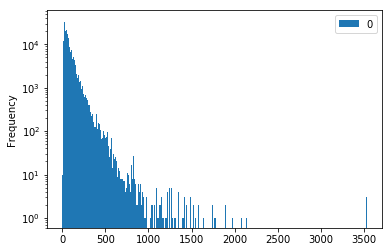

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.hist(len_summaries_df, bins=100)

en_len_df.plot.hist(bins=1000)
plt.yscale('log')
plt.show()

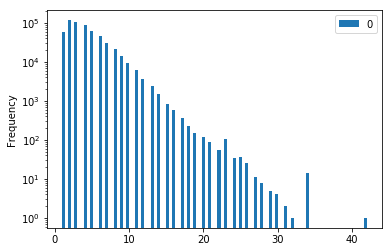

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.hist(len_summaries_df, bins=100)

de_len_df.plot.hist(bins=100)
plt.yscale('log')
plt.show()

In [25]:
max_encoder_seq_length = max([len(txt.split(' ')) for txt in en])
max_decoder_seq_length = max([len(txt.split(' ')) for txt in de])
print(max_encoder_seq_length)
print(max_decoder_seq_length)

3527
44
